In [1]:
import pickle
import random
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from tqdm import tqdm

In [2]:
wmt19_toen = pickle.load(open('../7_28-system-level_bleurt/wmt19_toen_bleurt.pkl', 'rb'))
wmt19_toen.head(1)

,system,sid,raw_score,score,N,lp,reference,source,output,year,bleurt
27600,DBMS-KU-KKEN.6726,751,2.0,-1.463163,1,kk-en,Three professional boxers from Kazakhstan will...,Қазақстандық үш кәсіпқой боксшы Мәскеуде жекпе...,three кәсіпқой қазақстандық боксшы өткізеді же...,2019,-1.62813


In [34]:
trials = 1000

100%|██████████| 1000/1000 [00:11<00:00, 86.52it/s]


10000 10000


100%|██████████| 1000/1000 [00:10<00:00, 93.57it/s]


10000 10000


100%|██████████| 1000/1000 [00:10<00:00, 92.58it/s]


10000 10000


100%|██████████| 1000/1000 [00:10<00:00, 92.37it/s]


10000 10000


100%|██████████| 1000/1000 [00:11<00:00, 84.17it/s]


10000 10000


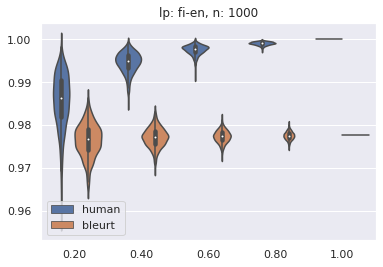

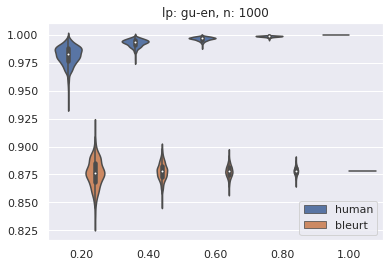

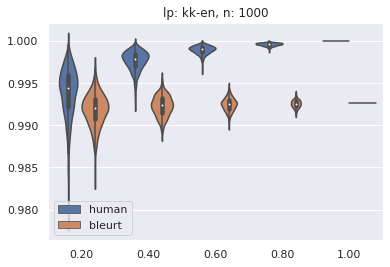

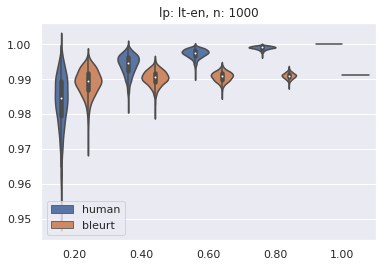

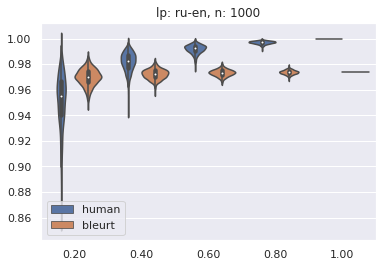

In [37]:
for lp, group in wmt19_toen.groupby(['lp']):
    sids = group.sid.unique()
    
    # A is fixed, largest test set
    A = group
    A_scores = A.groupby('system').mean()
    
    x, y, hue = [], [], []
    for proportion in np.linspace(1, 0, 5, endpoint=False):
        for i in tqdm(range(0, trials)):
            chosen = np.random.choice(sids, int(len(sids)*proportion), replace=False)
            B = group[group.sid.isin(chosen)]
            B_scores = B.groupby('system').mean()
            merged = pd.merge(A_scores, B_scores, on=['system'], suffixes=['_large', '_small'])
            r = merged.corr()['score_large']['score_small']
            x.append('%.2f' % proportion)
            y.append(r)
            hue.append('human')
            
            r = merged.corr()['score_large']['bleurt_small']
            x.append('%.2f' % proportion)
            y.append(r)
            hue.append('bleurt')
    
    
    ###
    # distplot
    plt.figure()
    plt.title('lp: %s, n: %d' % (lp, trials))
    print(len(x), len(y))
    sns.violinplot(x=x, y=y, hue=hue)